In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Salary.csv')

In [3]:
df

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [4]:
df['Position'].unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [5]:
df.drop(['Name','College'],axis=1,inplace=True)

In [6]:
df.drop(['DOJ'],axis=1,inplace=True)

In [7]:
df

,Team,Number,Position,Age,Weight,Salary
0,Boston Celtics,0,PG,25,180,7730337.0
1,Boston Celtics,99,SF,25,235,6796117.0
2,Boston Celtics,30,SG,27,205,NaN
3,Boston Celtics,28,SG,22,185,1148640.0
4,Boston Celtics,8,PF,29,231,5000000.0
...,...,...,...,...,...,...
452,Utah Jazz,41,PF,20,234,2239800.0
453,Utah Jazz,8,PG,26,203,2433333.0
454,Utah Jazz,25,PG,24,179,900000.0
455,Utah Jazz,21,C,26,256,2900000.0


In [8]:
df.isnull().sum()

Team         0
Number       0
Position     0
Age          0
Weight       0
Salary      11
dtype: int64

In [9]:
imp=SimpleImputer(strategy='mean')
df['Salary']=imp.fit_transform(df['Salary'].values.reshape(-1,1))

In [10]:
df['Salary']=df['Salary'].round(1)

In [11]:
df

,Team,Number,Position,Age,Weight,Salary
0,Boston Celtics,0,PG,25,180,7730337.0
1,Boston Celtics,99,SF,25,235,6796117.0
2,Boston Celtics,30,SG,27,205,4842684.1
3,Boston Celtics,28,SG,22,185,1148640.0
4,Boston Celtics,8,PF,29,231,5000000.0
...,...,...,...,...,...,...
452,Utah Jazz,41,PF,20,234,2239800.0
453,Utah Jazz,8,PG,26,203,2433333.0
454,Utah Jazz,25,PG,24,179,900000.0
455,Utah Jazz,21,C,26,256,2900000.0


In [12]:

le=LabelEncoder()

In [13]:
for i in df['Position']:
    df['Position'] = le.fit_transform(df['Position'])
    
for i in df['Team']:
    df['Team'] = le.fit_transform(df['Team'])

In [14]:
df.isnull().sum()

Team        0
Number      0
Position    0
Age         0
Weight      0
Salary      0
dtype: int64

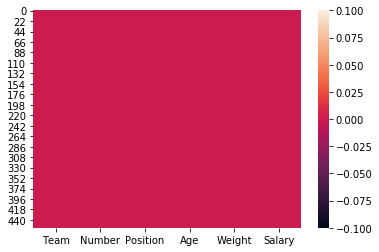

In [15]:
sns.heatmap(df.isnull())

In [16]:
cor=df.corr()

In [17]:
cor

,Team,Number,Position,Age,Weight,Salary
Team,1.000000,-0.054748,-0.009638,-0.042344,-0.001000,-0.039337
Number,-0.054748,1.000000,-0.177229,0.028724,0.206921,-0.111436
Position,-0.009638,-0.177229,1.000000,-0.062992,-0.590791,-0.094108
Age,-0.042344,0.028724,-0.062992,1.000000,0.087183,0.210627
Weight,-0.001000,0.206921,-0.590791,0.087183,1.000000,0.135552
Salary,-0.039337,-0.111436,-0.094108,0.210627,0.135552,1.000000


In [18]:
df.describe()

,Team,Number,Position,Age,Weight,Salary
count,457.000000,457.000000,457.00000,457.000000,457.000000,4.570000e+02
mean,14.520788,17.678337,2.07221,26.938731,221.522976,4.842684e+06
std,8.601312,15.966090,1.40692,4.404016,26.368343,5.165781e+06
min,0.000000,0.000000,0.00000,19.000000,161.000000,3.088800e+04
25%,7.000000,5.000000,1.00000,24.000000,200.000000,1.100602e+06
50%,15.000000,13.000000,2.00000,26.000000,220.000000,2.869440e+06
75%,22.000000,25.000000,3.00000,30.000000,240.000000,6.331404e+06
max,29.000000,99.000000,4.00000,40.000000,307.000000,2.500000e+07


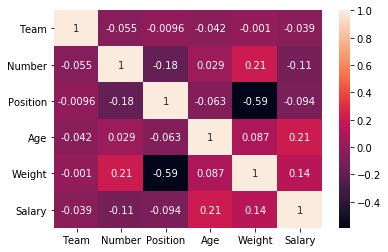

In [21]:
sns.heatmap(cor,annot=True)

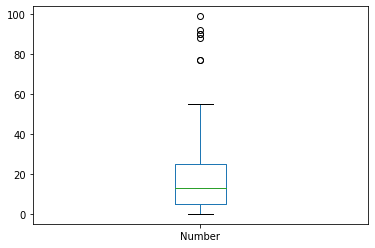

In [29]:
df['Number'].plot.box()

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.57366745e+00, 1.10845611e+00, 5.13811794e-02, 4.40701238e-01,
        1.57645405e+00, 5.59609022e-01],
       [1.57366745e+00, 5.09898044e+00, 6.60170305e-01, 4.40701238e-01,
        5.11666342e-01, 3.78563045e-01],
       [1.57366745e+00, 7.72585267e-01, 1.37172179e+00, 1.39273529e-02,
        6.27308418e-01, 1.01773535e-09],
       ...,
       [1.56882854e+00, 4.59078370e-01, 5.13811794e-02, 6.68015534e-01,
        1.61441988e+00, 7.64067455e-01],
       [1.56882854e+00, 2.08272853e-01, 1.47448415e+00, 2.13386943e-01,
        1.30894867e+00, 3.76479997e-01],
       [1.56882854e+00, 3.96376991e-01, 1.47448415e+00, 2.13386943e-01,
        3.59803041e-01, 7.54905662e-01]])

In [32]:
print(np.where(z>3))

(array([  1,   5,  33,  68, 100, 109, 169, 222, 251, 339, 372, 391, 398,
       405], dtype=int64), array([1, 1, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 4], dtype=int64))


In [33]:
df_new=df[(z<3).all(axis=1)]

In [35]:
df_new.shape

(443, 6)

In [36]:
df.shape

(457, 6)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.externals import joblib

In [58]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,5:6]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [60]:
x_train.shape

(354, 5)

In [61]:
y_train.shape

(354, 1)

In [62]:
x_test.shape

(89, 5)

In [63]:
LR=LinearRegression()

In [64]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
LR.coef_

array([[-30250.08002586, -58324.02644784, -24295.90664487,
        167099.23008787,  21991.10392407]])

In [66]:
LR.intercept_

array([-3290070.65031092])

In [67]:
LR.score(x_train,y_train)

0.06099322411391517

In [68]:
pred=LR.predict(x_test)
pred

array([[5082402.89006191],
       [5193895.76401991],
       [5012887.25453671],
       [4395118.49204649],
       [2990209.75663218],
       [4375295.30792612],
       [4781963.13360384],
       [5436647.28268141],
       [5318028.99260901],
       [1232123.15675756],
       [3898980.97976646],
       [4474463.99933125],
       [3173804.54035172],
       [5249161.43373621],
       [2693065.35207926],
       [4350015.59342237],
       [5524687.23664368],
       [3563722.6360944 ],
       [3496454.21076459],
       [5689080.46254359],
       [4977824.78890704],
       [5384111.24163916],
       [3490039.03798142],
       [3780243.25771156],
       [1905815.56846088],
       [4484893.8405977 ],
       [3306792.88508232],
       [4080427.29689325],
       [3323334.17137263],
       [2533408.97351717],
       [2350645.41182743],
       [5915137.3779775 ],
       [3459368.86307009],
       [4632968.68727177],
       [6636261.65288326],
       [6232048.57761832],
       [3141614.38638078],
 

In [71]:
print("Errors:")
print("Mean Squered",mean_squared_error(y_test,pred))
print("Mean absulate",mean_absolute_error(y_test,pred))
print("RMS",np.sqrt(mean_squared_error(y_test,pred)))

Errors:
Mean Squered 19570082170507.766
Mean absulate 3406865.417316498
RMS 4423808.559432445


In [81]:
LR.predict(x.iloc[[17]])

array([[6229585.47107723]])

In [82]:
print(r2_score(y_test,pred))

0.07676234957254968


In [83]:
lrscore=cross_val_score(LR,x,y,cv=5)
print('cross validation=',lrscore)
print(lrscore.mean(),lrscore.std())

cross validation= [ 0.08572718  0.05749591 -0.06407264  0.07828952  0.00385506]
0.03225900543169491 0.056037711433005906


In [87]:
from sklearn.externals import joblib
joblib.dump(LR,'LR_Salry.pkl')

['LR_Salry.pkl']